In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [239]:
sns.set_style('whitegrid')

In [240]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [241]:
df = pd.read_csv("../Data/seoul.csv")
df

,군구,년도,전입인구,전출인구,등록외국인,주민등록인구,출생아수,산부인과의원수,소아청소년과의원수,유치원수,유치원원아수,초등학교수,초등학교학생수,문화기반시설수
0,종로구,2013,24676,30007,7797,160070,873,9,4,17,1263,14,6561,57
1,종로구,2014,24191,27484,8351,156993,905,9,4,17,1274,14,6233,59
2,종로구,2015,24951,27470,8836,154986,906,9,4,17,1238,14,6084,61
3,종로구,2016,23604,26386,9185,152737,846,9,4,17,1330,13,5686,64
4,종로구,2017,28020,25814,9487,154770,689,9,4,17,1320,13,5561,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,강동구,2017,81615,90819,4136,436223,2968,18,23,35,4506,27,20161,10
221,강동구,2018,59334,68933,4347,427573,2659,17,24,35,4309,27,19831,12
222,강동구,2019,75101,67292,4323,436067,2437,17,26,32,3746,27,19622,12
223,강동구,2020,101437,78271,4028,459970,2535,17,25,35,4237,28,21353,13


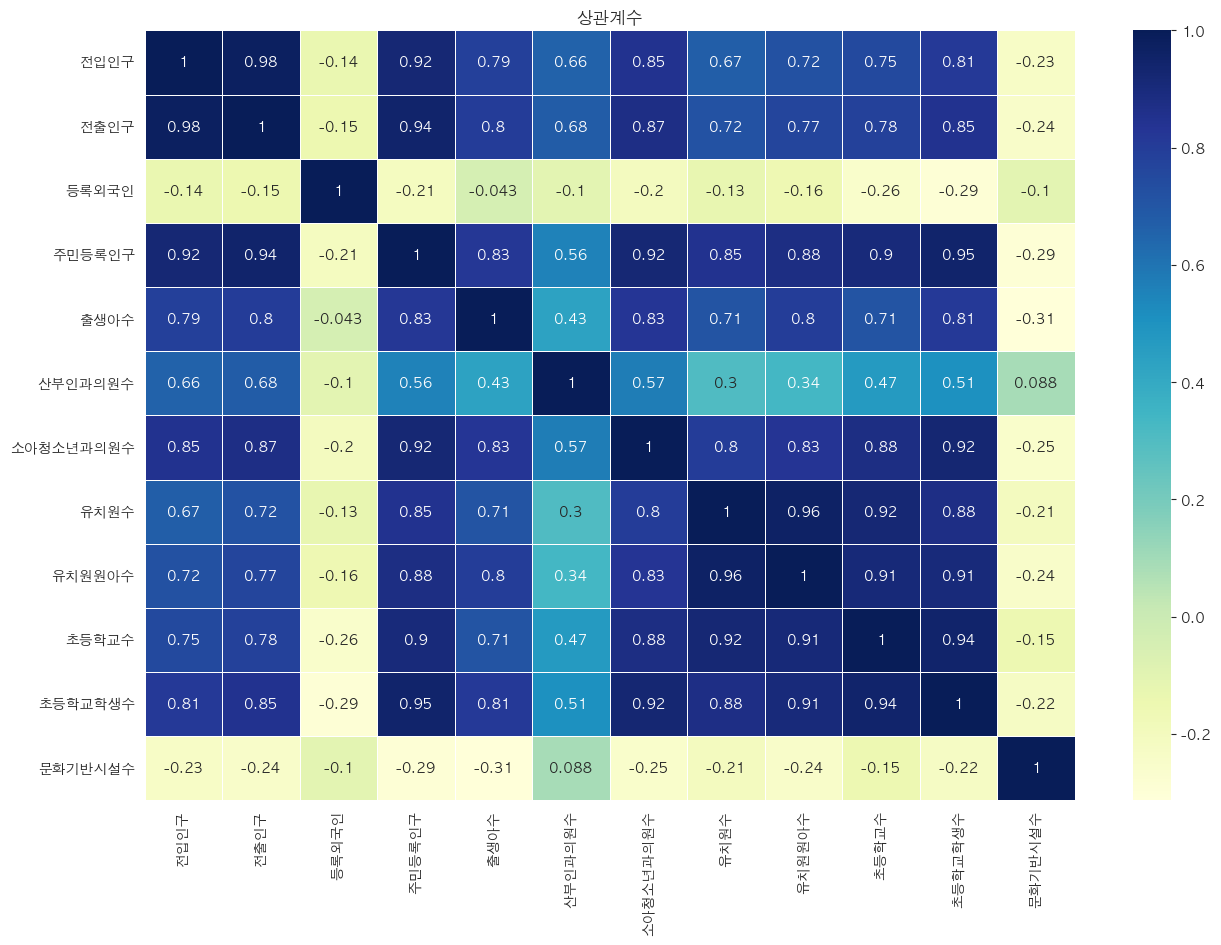

In [242]:
target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','유치원수','유치원원아수','초등학교수','초등학교학생수','문화기반시설수']
plt.figure(figsize=(15,10))
sns.heatmap(
    df[target_col].corr(),
    annot = True, # True로 해야 숫자가 보임
    # fmt = 'f', # 실수
    cmap='YlGnBu',
    linewidth = 0.5
)
plt.title('상관계수')
# plt.xticks(rotation=15)
plt.show()

In [243]:
target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','유치원수','유치원원아수','초등학교수','초등학교학생수','문화기반시설수']
df[target_col]

,전입인구,전출인구,등록외국인,주민등록인구,출생아수,산부인과의원수,소아청소년과의원수,유치원수,유치원원아수,초등학교수,초등학교학생수,문화기반시설수
0,24676,30007,7797,160070,873,9,4,17,1263,14,6561,57
1,24191,27484,8351,156993,905,9,4,17,1274,14,6233,59
2,24951,27470,8836,154986,906,9,4,17,1238,14,6084,61
3,23604,26386,9185,152737,846,9,4,17,1330,13,5686,64
4,28020,25814,9487,154770,689,9,4,17,1320,13,5561,64
...,...,...,...,...,...,...,...,...,...,...,...,...
220,81615,90819,4136,436223,2968,18,23,35,4506,27,20161,10
221,59334,68933,4347,427573,2659,17,24,35,4309,27,19831,12
222,75101,67292,4323,436067,2437,17,26,32,3746,27,19622,12
223,101437,78271,4028,459970,2535,17,25,35,4237,28,21353,13


<Figure size 2500x1500 with 0 Axes>

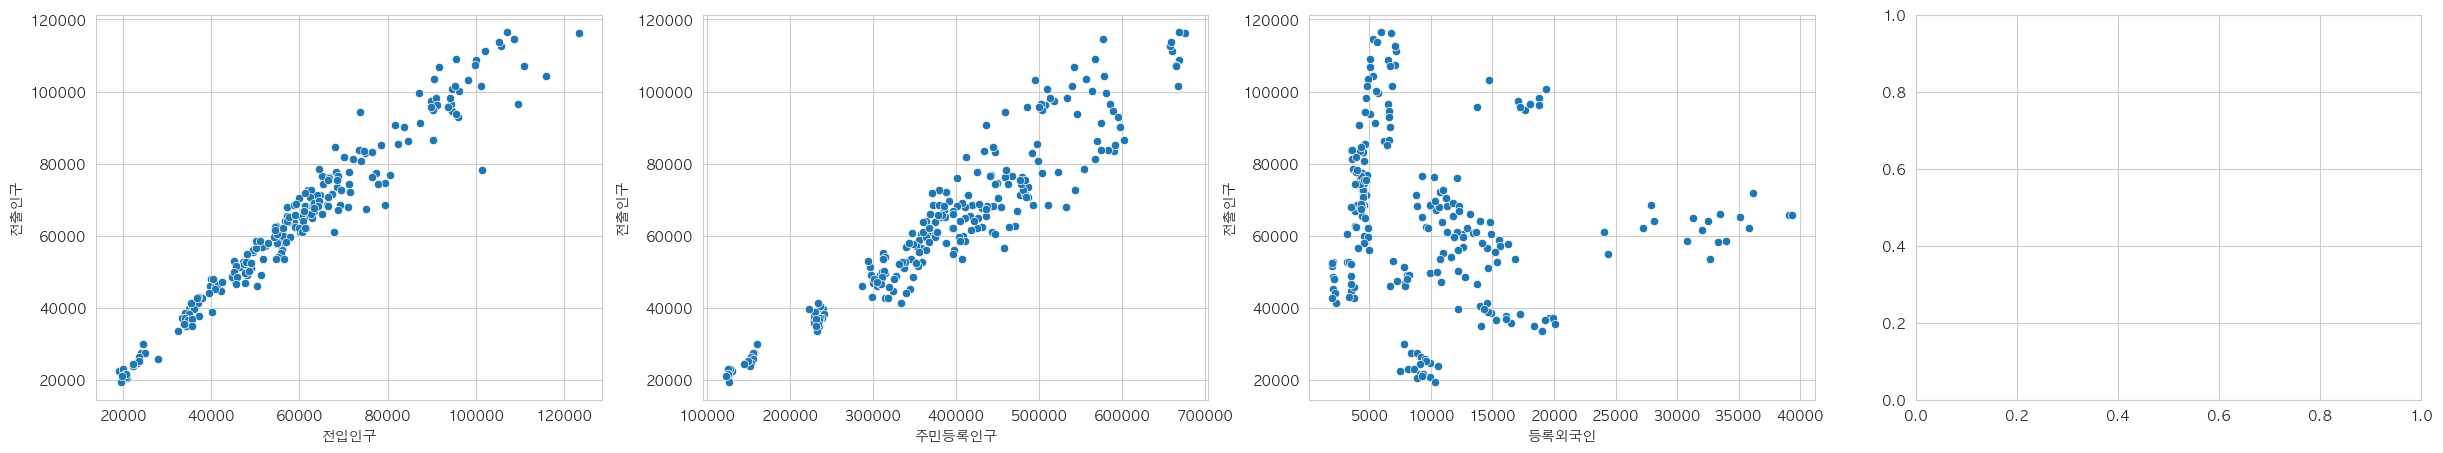

In [244]:
plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=4,figsize=(30,5))
sns.scatterplot(x="전입인구", y="전출인구", data=df, ax=ax[0])
sns.scatterplot(x="주민등록인구", y="전출인구", data=df, ax=ax[1])
sns.scatterplot(x="등록외국인", y="전출인구", data=df, ax=ax[2])
# sns.scatterplot(x="산부인과의원수", y="전출인구", data=df, ax=ax[3])
plt.show()

<Figure size 2500x1500 with 0 Axes>

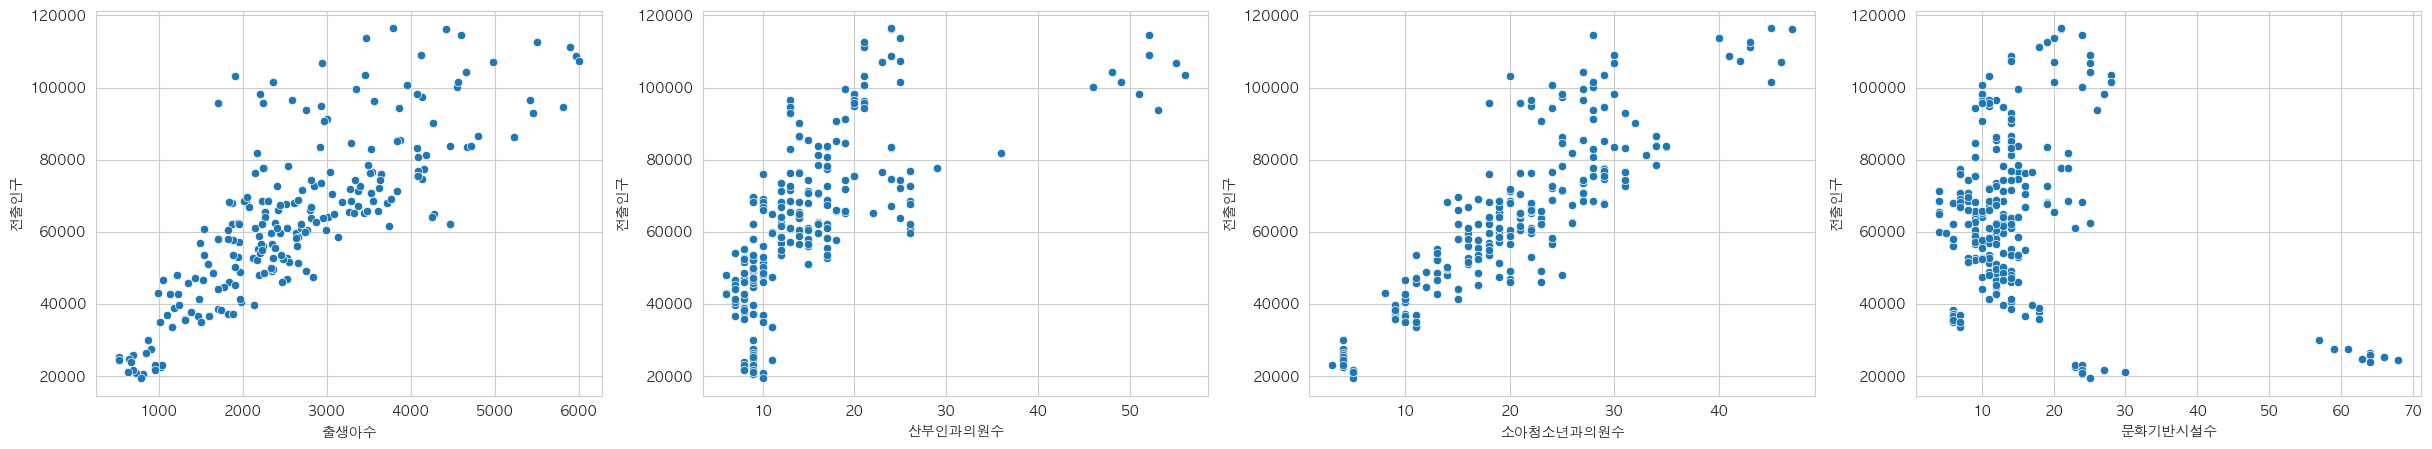

In [245]:
plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=4,figsize=(30,5))
sns.scatterplot(x="출생아수", y="전출인구", data=df, ax=ax[0])
sns.scatterplot(x="산부인과의원수", y="전출인구", data=df, ax=ax[1])
sns.scatterplot(x="소아청소년과의원수", y="전출인구", data=df, ax=ax[2])
sns.scatterplot(x="문화기반시설수", y="전출인구", data=df, ax=ax[3])
plt.show()

<Figure size 2500x1500 with 0 Axes>

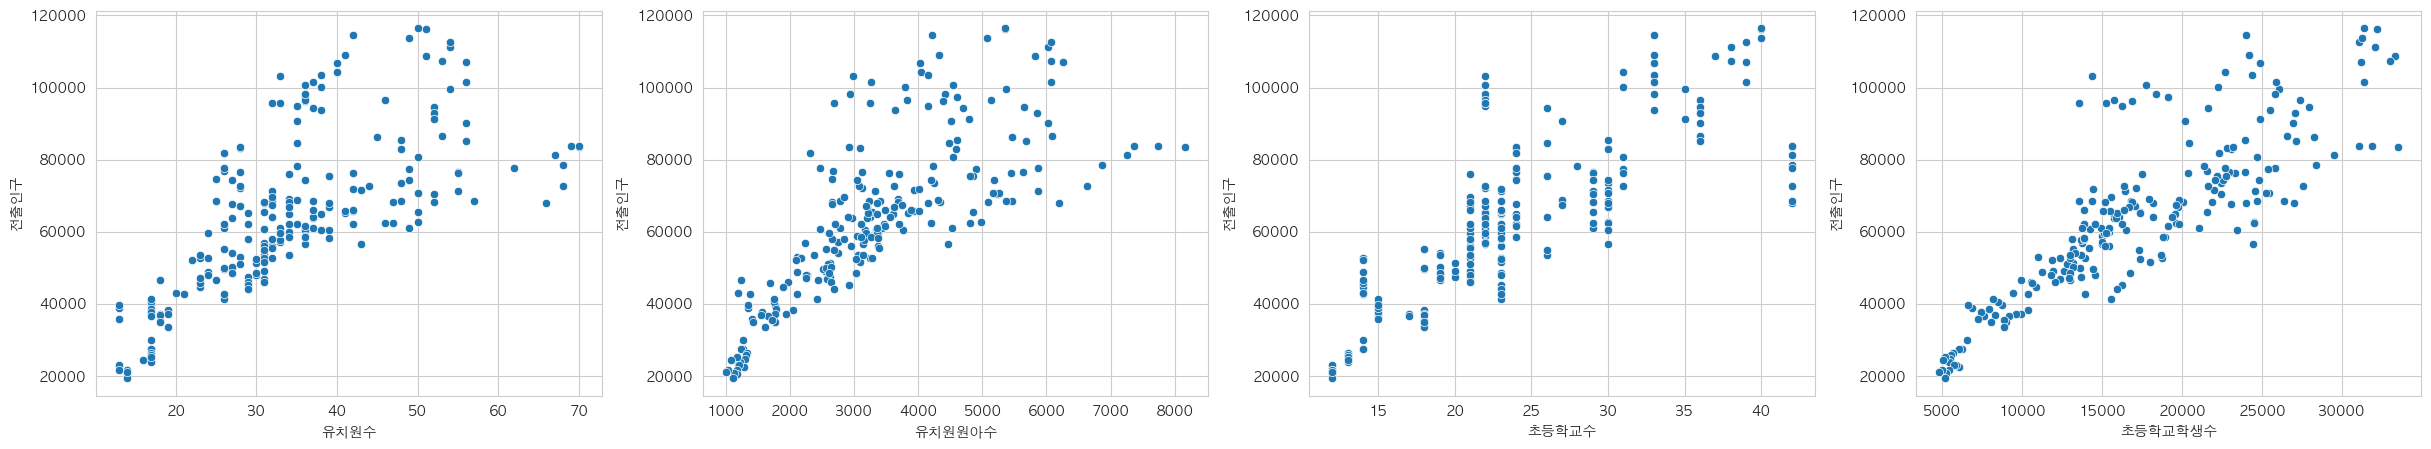

In [246]:
plt.figure(figsize=(25,15))
fig, ax = plt.subplots(ncols=4,figsize=(30,5))
sns.scatterplot(x="유치원수", y="전출인구", data=df, ax=ax[0])
sns.scatterplot(x="유치원원아수", y="전출인구", data=df, ax=ax[1])
sns.scatterplot(x="초등학교수", y="전출인구", data=df, ax=ax[2])
sns.scatterplot(x="초등학교학생수", y="전출인구", data=df, ax=ax[3])
plt.show()

In [247]:
# # 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','유치원수','유치원원아수','초등학교수','초등학교학생수','문화기반시설수']
# sns.pairplot(
#     df,
#     vars = target_col,
#     # kind = 'reg'
# )
# plt.show()

In [248]:
# # 총 인구, 남성 인구, 여성 인구, 주택수, 빈집수, 자동차등록대수, 전입인구, 전출인구에 대한 상관관계 시각화
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
# sns.pairplot(
#     df.loc[:,target_col],
#     vars = target_col,
#     kind = 'reg'
# )
# plt.show()

In [249]:
# 조인트 그래프 - 산점도 (기본값)
def jointplotFun(a, b):    
    j1 = sns.jointplot(
        x=df[a]/1000,
        y=df[b]/1000,
        data=df,
        # hue="cluster_id",
        legend=True,
        palette='rainbow',
        s=200,
        alpha=0.6,
        # height=10, 
    )
    plt.xlabel(f"{a}(단위: 1000명)")
    plt.ylabel(f"{b}(단위: 1000명)")

    j1.fig.suptitle(f'{a}-{b} 산포도', size=15)
    plt.legend(loc='right')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


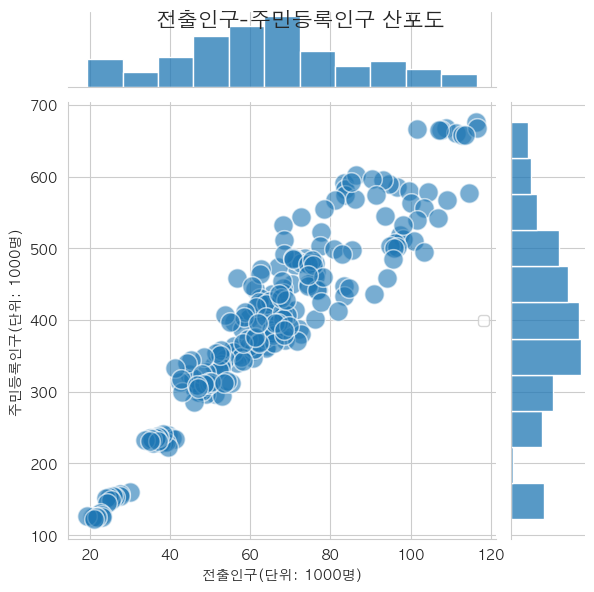

In [250]:
jointplotFun('전출인구', '주민등록인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


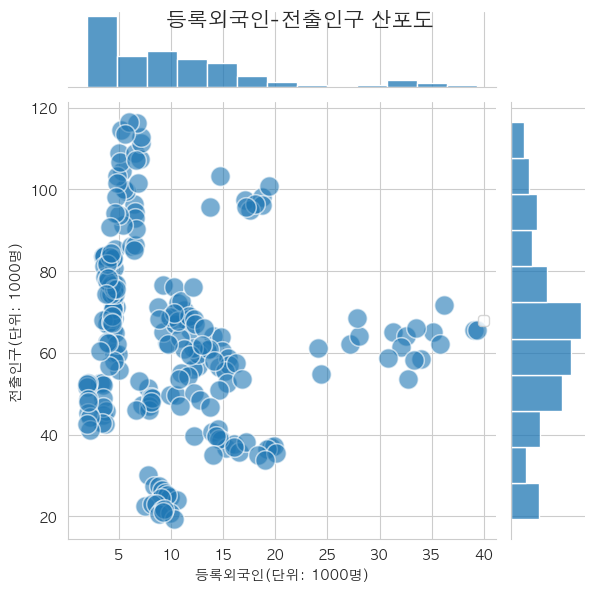

In [251]:
jointplotFun('등록외국인', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


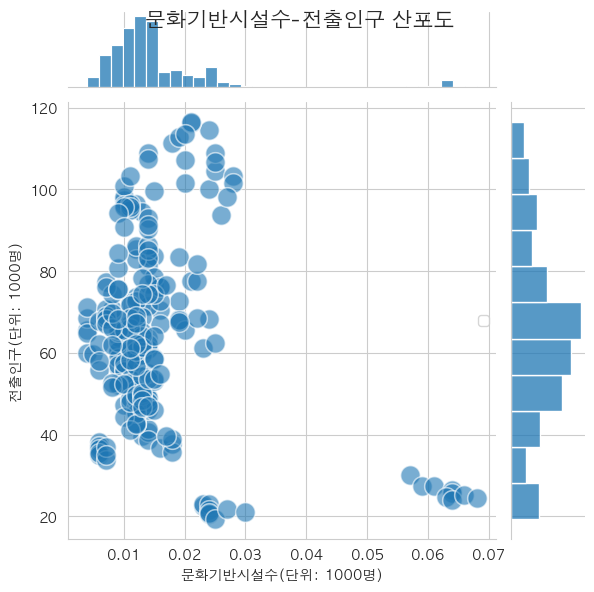

In [252]:
jointplotFun('문화기반시설수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


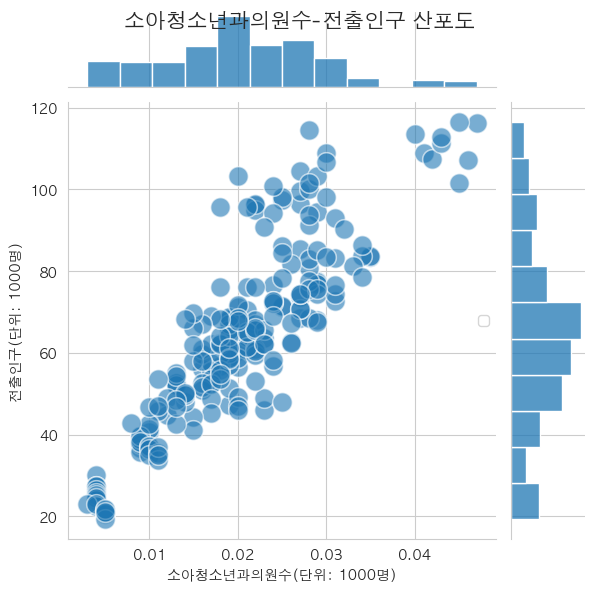

In [253]:
jointplotFun('소아청소년과의원수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


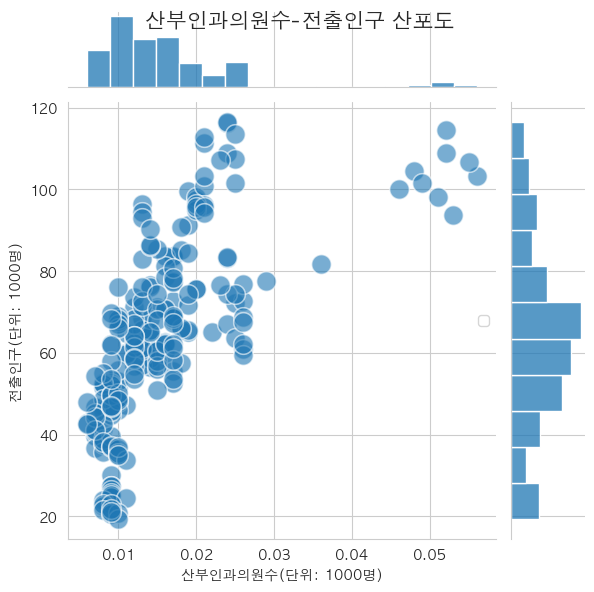

In [254]:
jointplotFun('산부인과의원수', '전출인구')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


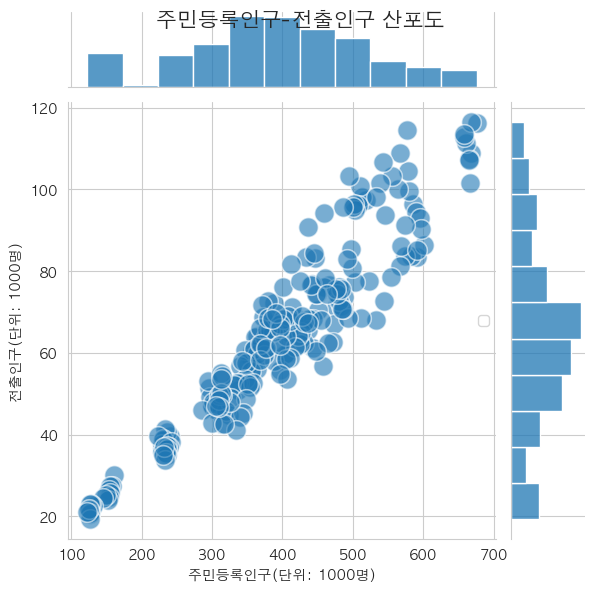

In [255]:
jointplotFun('주민등록인구', '전출인구')

In [256]:
df

,군구,년도,전입인구,전출인구,등록외국인,주민등록인구,출생아수,산부인과의원수,소아청소년과의원수,유치원수,유치원원아수,초등학교수,초등학교학생수,문화기반시설수
0,종로구,2013,24676,30007,7797,160070,873,9,4,17,1263,14,6561,57
1,종로구,2014,24191,27484,8351,156993,905,9,4,17,1274,14,6233,59
2,종로구,2015,24951,27470,8836,154986,906,9,4,17,1238,14,6084,61
3,종로구,2016,23604,26386,9185,152737,846,9,4,17,1330,13,5686,64
4,종로구,2017,28020,25814,9487,154770,689,9,4,17,1320,13,5561,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,강동구,2017,81615,90819,4136,436223,2968,18,23,35,4506,27,20161,10
221,강동구,2018,59334,68933,4347,427573,2659,17,24,35,4309,27,19831,12
222,강동구,2019,75101,67292,4323,436067,2437,17,26,32,3746,27,19622,12
223,강동구,2020,101437,78271,4028,459970,2535,17,25,35,4237,28,21353,13


----
# 컬럼 삭제

In [257]:
df = df.drop(columns=['전입인구', '등록외국인', '소아청소년과의원수', '유치원수', '유치원원아수', '초등학교학생수', '문화기반시설수'])
df.head()

,군구,년도,전출인구,주민등록인구,출생아수,산부인과의원수,초등학교수
0,종로구,2013,30007,160070,873,9,14
1,종로구,2014,27484,156993,905,9,14
2,종로구,2015,27470,154986,906,9,14
3,종로구,2016,26386,152737,846,9,13
4,종로구,2017,25814,154770,689,9,13


In [258]:
df.rename(columns={'주민등록인구':'총인구'}, inplace=True)
df = df[['군구','년도','총인구','전출인구','출생아수','산부인과의원수','초등학교수']]
df.head()

,군구,년도,총인구,전출인구,출생아수,산부인과의원수,초등학교수
0,종로구,2013,160070,30007,873,9,14
1,종로구,2014,156993,27484,905,9,14
2,종로구,2015,154986,27470,906,9,14
3,종로구,2016,152737,26386,846,9,13
4,종로구,2017,154770,25814,689,9,13


## k값 찾기

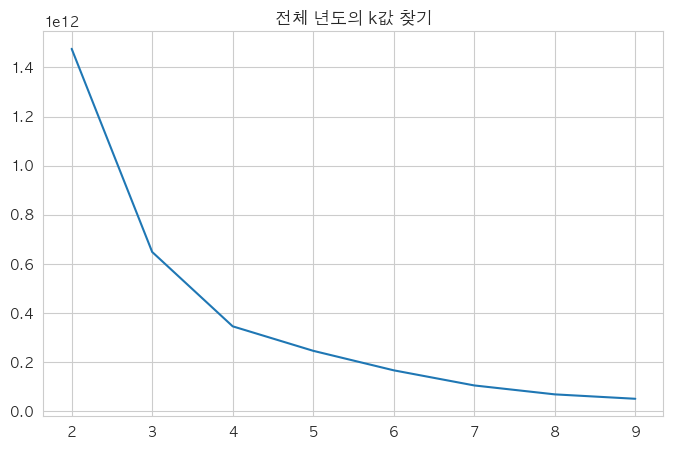

In [259]:
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
# target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
target_col = df.columns[2:]

df_temp = df.copy()
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_temp[target_col])
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

In [260]:
df[target_col]

,총인구,전출인구,출생아수,산부인과의원수,초등학교수
0,160070,30007,873,9,14
1,156993,27484,905,9,14
2,154986,27470,906,9,14
3,152737,26386,846,9,13
4,154770,25814,689,9,13
...,...,...,...,...,...
220,436223,90819,2968,18,27
221,427573,68933,2659,17,27
222,436067,67292,2437,17,27
223,459970,78271,2535,17,28


In [261]:
# 일자와 관련된 컬럼을 제외하고 data의 크기 비교
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
df[target_col].describe()

,총인구,전출인구,출생아수,산부인과의원수,초등학교수
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,394354.462222,64130.928889,2650.800000,15.640000,24.102222
std,128426.549365,22464.759983,1176.254494,9.191378,7.563614
min,122499.000000,19384.000000,528.000000,6.000000,12.000000
25%,314194.000000,49012.000000,1884.000000,9.000000,20.000000
50%,395963.000000,63689.000000,2481.000000,14.000000,23.000000
75%,479835.000000,76521.000000,3456.000000,18.000000,29.000000
max,675961.000000,116457.000000,6001.000000,56.000000,42.000000


----
## 표준화해보기

In [262]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [263]:
dfScaled = scaler.fit_transform(df[target_col])
dfScaled = pd.DataFrame(dfScaled)
dfScaled.columns = target_col
dfScaled

,총인구,전출인구,출생아수,산부인과의원수,초등학교수
0,0.067884,0.109433,0.063037,0.06,0.066667
1,0.062324,0.083442,0.068884,0.06,0.066667
2,0.058698,0.083298,0.069066,0.06,0.066667
3,0.054634,0.072131,0.058103,0.06,0.033333
4,0.058308,0.066239,0.029417,0.06,0.033333
...,...,...,...,...,...
220,0.566839,0.735889,0.445825,0.24,0.500000
221,0.551210,0.510430,0.389366,0.22,0.500000
222,0.566557,0.493525,0.348803,0.22,0.500000
223,0.609746,0.606626,0.366709,0.22,0.533333


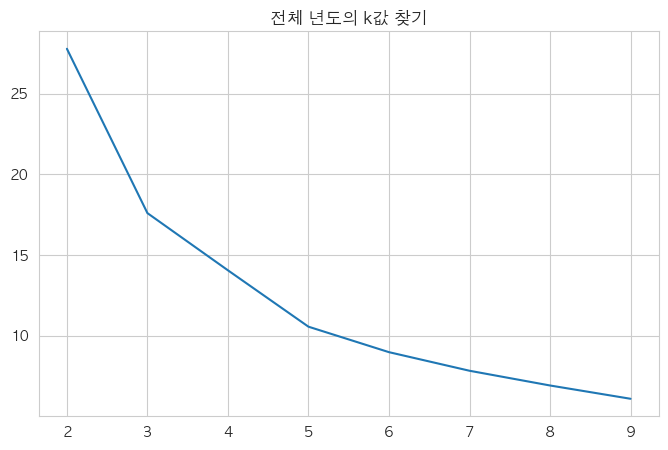

In [264]:
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']

df_temp = dfScaled.copy()
# df_km = df_temp[df_temp.columns.difference(['총인구'])] # 총인구 컬럼이 존재할 때 사용한 것임
# k값 찾기 --------------------------------------------
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_temp[target_col])
    scores.append(km.inertia_)
# 그래프 그리기 ------------------
plt.figure(figsize=(8,5))
plt.plot(range(2,10), scores)
plt.title('전체 년도의 k값 찾기')
plt.show()
# -----------------------------

In [265]:
dfScaled.to_csv("../Data/seoul_scaled.csv")

----
# Clustering
### K 적용하여 군집 - 표준화X

In [266]:
# target_col = ['전입인구','전출인구','등록외국인','주민등록인구','출생아수','산부인과의원수','소아청소년과의원수','문화기반시설수']
# target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
target_col = df.columns[2:]

data_points = df[target_col].values
km = KMeans(n_clusters=4).fit(data_points) # n_clusters 에 값을 정해주기!

# labels
print(km.labels_)
# 각 군집의 중심위치
km.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 0 0 0 3 3 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 3 3 3 3
 3 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3
 3 3 3]


array([[3.51288828e+05, 5.64771954e+04, 2.30150575e+03, 1.28160920e+01,
        2.09195402e+01],
       [5.94586735e+05, 9.71002059e+04, 4.24573529e+03, 2.72647059e+01,
        3.70294118e+01],
       [1.86319694e+05, 3.06521389e+04, 1.15722222e+03, 8.86111111e+00,
        1.45277778e+01],
       [4.59473059e+05, 7.51626324e+04, 3.09094118e+03, 1.70294118e+01,
        2.67794118e+01]])

In [267]:
# 데이터가 어느 군집에 소속되어 있는지 정하기
df['cluster_id'] = km.labels_
df

,군구,년도,총인구,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,160070,30007,873,9,14,2
1,종로구,2014,156993,27484,905,9,14,2
2,종로구,2015,154986,27470,906,9,14,2
3,종로구,2016,152737,26386,846,9,13,2
4,종로구,2017,154770,25814,689,9,13,2
...,...,...,...,...,...,...,...,...
220,강동구,2017,436223,90819,2968,18,27,3
221,강동구,2018,427573,68933,2659,17,27,3
222,강동구,2019,436067,67292,2437,17,27,3
223,강동구,2020,459970,78271,2535,17,28,3


In [268]:
# 조인트 그래프 - 산점도 (기본값)
def jointplotFun(a, b):    
    j1 = sns.jointplot(
        x=df[a]/1000,
        y=df[b]/1000,
        data=df,
        hue="cluster_id",
        legend=True,
        palette='rainbow',
        s=200,
        alpha=0.6,
        # height=10, 
    )
    plt.xlabel(f"{a}(단위: 1000명)")
    plt.ylabel(f"{b}(단위: 1000명)")

    j1.fig.suptitle(f'{a}-{b} 산포도', size=15)
    plt.legend(loc='right')
    plt.show()

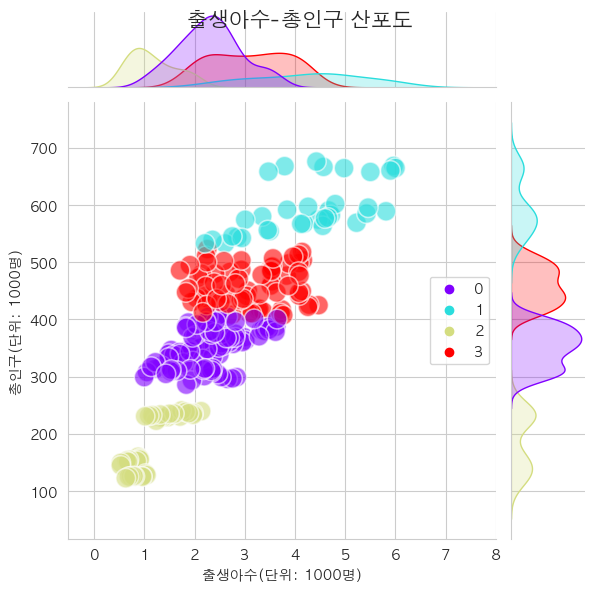

In [269]:
jointplotFun('출생아수', '총인구')

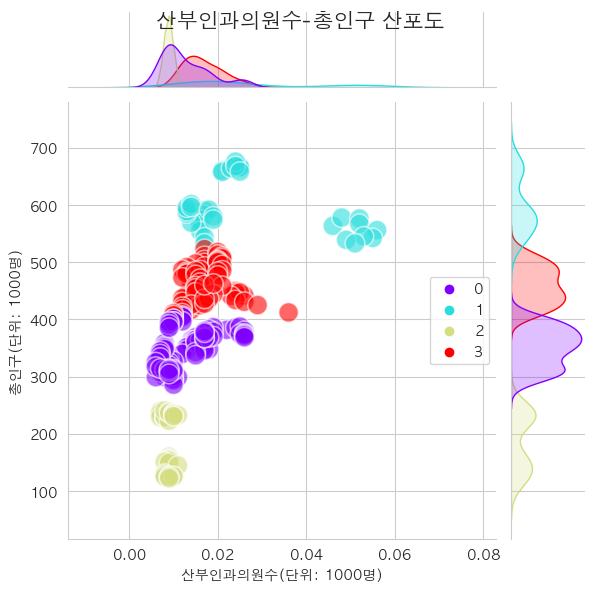

In [270]:
jointplotFun('산부인과의원수', '총인구')

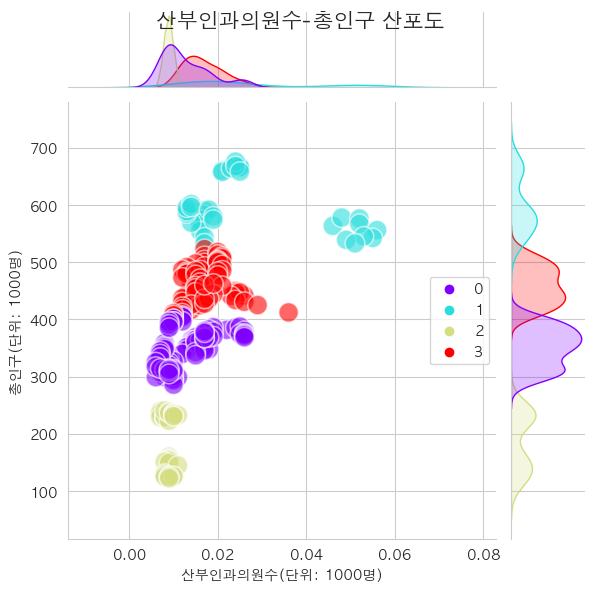

In [271]:
jointplotFun('산부인과의원수', '총인구')

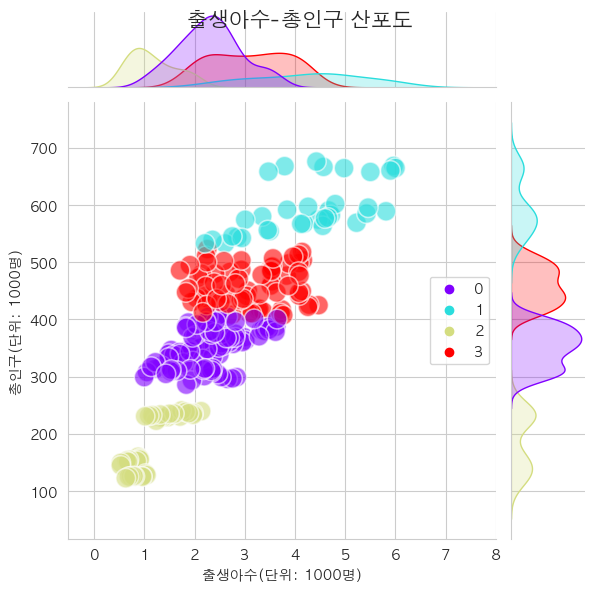

In [272]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x=df['출생아수']/1000,
    y=df['총인구']/1000,
    data=df,
    hue="cluster_id",
    legend=True,
    palette='rainbow',
    s=200,
    alpha=0.6,
    # height=10, 
)
plt.xlabel("출생아수(단위: 1000명)")
plt.ylabel("총인구(단위: 1000명)")

j1.fig.suptitle('출생아수-총인구 산포도', size=15)
plt.legend(loc='right')
plt.show()

In [273]:
df

,군구,년도,총인구,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,160070,30007,873,9,14,2
1,종로구,2014,156993,27484,905,9,14,2
2,종로구,2015,154986,27470,906,9,14,2
3,종로구,2016,152737,26386,846,9,13,2
4,종로구,2017,154770,25814,689,9,13,2
...,...,...,...,...,...,...,...,...
220,강동구,2017,436223,90819,2968,18,27,3
221,강동구,2018,427573,68933,2659,17,27,3
222,강동구,2019,436067,67292,2437,17,27,3
223,강동구,2020,459970,78271,2535,17,28,3


----
# Classification

In [274]:
# Feature, Target
target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']

data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [275]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2, stratify=target) # , random_state=42

In [276]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2, stratify=train_target) # , random_state=42

In [277]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (144, 4)
Valid : (36, 4)
Test  : (45, 4)


In [278]:
# 모델 tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print("Train score :", dt.score(sub_input, sub_target))
print("Valid score :", dt.score(val_input, val_target))

Train score : 1.0
Valid score : 0.7222222222222222


In [279]:
# 각 ML별 import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate

ml_list = [KNeighborsClassifier(n_neighbors=3), SVC(), GaussianProcessClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), MLPClassifier(), GaussianNB(), QuadraticDiscriminantAnalysis()]
for ml in ml_list:
    print("- ML :", ml)
    clf = ml
    # 학습
    clf.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", clf.score(sub_input, sub_target))
    print("+ Valid score :", clf.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(clf, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    print("-"*30)

- ML : KNeighborsClassifier(n_neighbors=3)
+ Train score : 0.8819444444444444
+ Valid score : 0.75
+ Test score : 0.7555555555555555
------------------------------
- ML : SVC()
+ Train score : 0.7569444444444444
+ Valid score : 0.7777777777777778
+ Test score : 0.7555555555555555
------------------------------
- ML : GaussianProcessClassifier()
+ Train score : 1.0
+ Valid score : 0.3055555555555556
+ Test score : 0.3
------------------------------
- ML : DecisionTreeClassifier()
+ Train score : 1.0
+ Valid score : 0.75
+ Test score : 0.9166666666666666
------------------------------
- ML : RandomForestClassifier()
+ Train score : 1.0
+ Valid score : 0.8611111111111112
+ Test score : 0.9222222222222222
------------------------------
- ML : AdaBoostClassifier()
+ Train score : 0.7013888888888888
+ Valid score : 0.6666666666666666
+ Test score : 0.711111111111111
------------------------------
- ML : MLPClassifier()
+ Train score : 0.2986111111111111
+ Valid score : 0.3055555555555556
+ T

----
### KFold를 이용한 방법

In [280]:
from sklearn.model_selection import cross_validate

In [281]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold() # default : 5
scores = cross_validate(dt, train_input, train_target, cv=splitter)
scores

{'fit_time': array([0.00115585, 0.00062895, 0.00046802, 0.00039387, 0.00040317]),
 'score_time': array([0.00029802, 0.00025225, 0.0001471 , 0.0001359 , 0.00014186]),
 'test_score': array([0.91666667, 0.97222222, 0.91666667, 0.88888889, 0.88888889])}

In [282]:
np.mean(scores['test_score'])

0.9166666666666666

In [283]:
# KFold의 Fold 중 10개로 나누어서 교차검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # default : 5
scores = cross_validate(dt, train_input, train_target, cv=splitter)
scores

{'fit_time': array([0.00100422, 0.00047398, 0.00040078, 0.00040388, 0.00040221,
        0.00042391, 0.00039411, 0.00039291, 0.00039196, 0.00040102]),
 'score_time': array([0.00029087, 0.00015497, 0.00013113, 0.00012922, 0.00013781,
        0.00013113, 0.00012994, 0.00013304, 0.00012803, 0.00012898]),
 'test_score': array([0.94444444, 0.83333333, 0.88888889, 0.88888889, 0.83333333,
        0.94444444, 0.94444444, 0.88888889, 0.83333333, 0.94444444])}

In [284]:
np.mean(scores['test_score'])

0.8944444444444443

----
----
# Regression
1. cluster_id : [0, 1, 2, 3] -> [0 ~ 1] 변환
2. Regression 진행

In [285]:
df['cluster_id'] = df['cluster_id'] + 10
df_temp = df.sort_values(by='총인구', ascending=False)
temp_list = df_temp['cluster_id'].unique()

i = 0
for temp in temp_list:
    df['cluster_id'][df['cluster_id'] == temp] = i
    i+=1
df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
df['cluster_id'].unique()

# i = 3
# for temp in temp_list:
#     df['cluster_id'][df['cluster_id'] == temp] = i
#     i-=1
# df['cluster_id'] = np.round(df['cluster_id'] / 3, 2)
# df['cluster_id'].unique()

array([1.  , 0.67, 0.33, 0.  ])

In [286]:
# 조인트 그래프 - 산점도 (기본값)
def jointplotFun(a, b):    
    j1 = sns.jointplot(
        x=df[a]/1000,
        y=df[b]/1000,
        data=df,
        hue="cluster_id",
        legend=True,
        palette='rainbow',
        s=200,
        alpha=0.6,
        # height=10, 
    )
    plt.xlabel(f"{a}(단위: 1000명)")
    plt.ylabel(f"{b}(단위: 1000명)")

    j1.fig.suptitle(f'{a}-{b} 산포도', size=15)
    plt.legend(loc='right')
    plt.show()

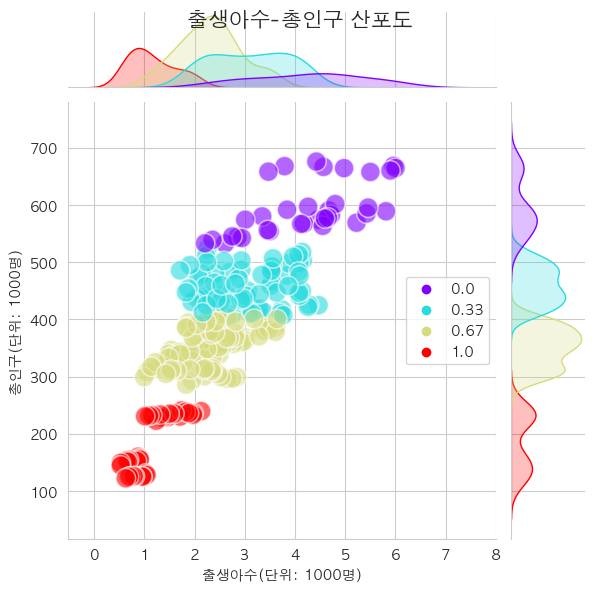

In [287]:
jointplotFun('출생아수', '총인구')

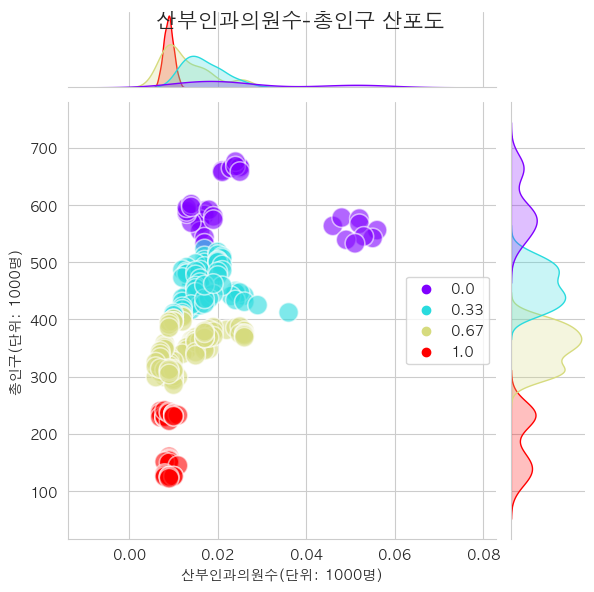

In [288]:
jointplotFun('산부인과의원수', '총인구')

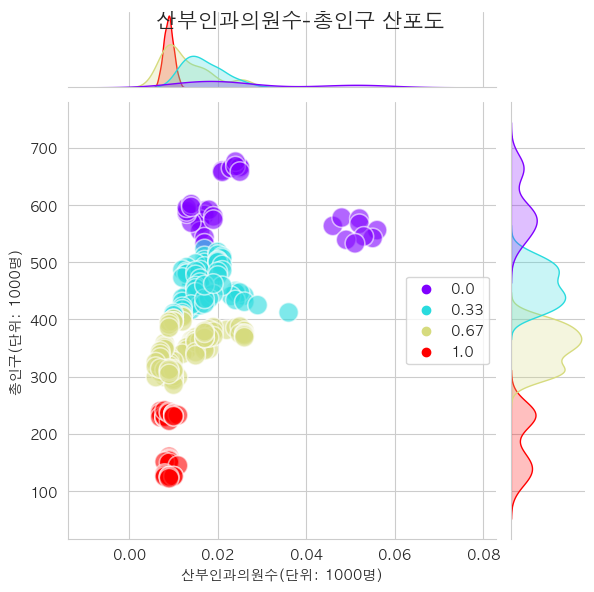

In [289]:
jointplotFun('산부인과의원수', '총인구')

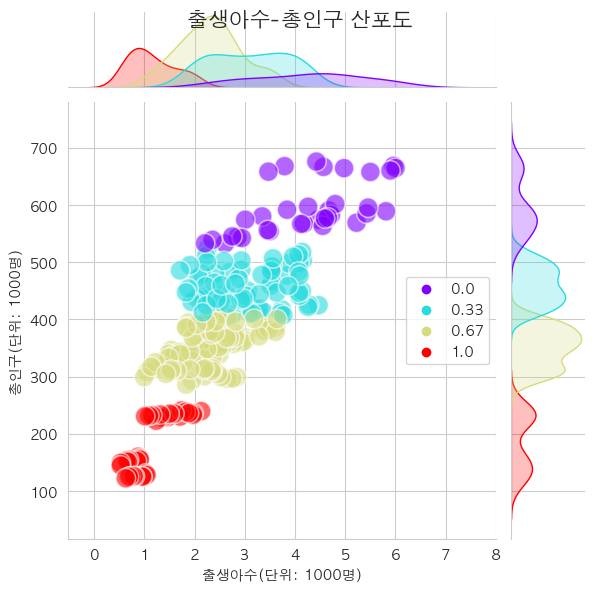

In [290]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x=df['출생아수']/1000,
    y=df['총인구']/1000,
    data=df,
    hue="cluster_id",
    legend=True,
    palette='rainbow',
    s=200,
    alpha=0.6,
    # height=10, 
)
plt.xlabel("출생아수(단위: 1000명)")
plt.ylabel("총인구(단위: 1000명)")

j1.fig.suptitle('출생아수-총인구 산포도', size=15)
plt.legend(loc='right')
plt.show()

In [291]:
# Feature, Target
# target_col = ['전출인구','출생아수','산부인과의원수','초등학교수']
target_col = df.columns[2:]

data = df[target_col].to_numpy()
target = df['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [292]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [293]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2) # random_state=42, stratify=train_target

In [294]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (144, 6)
Valid : (36, 6)
Test  : (45, 6)


----

### 각 ML 별 Score 확인

In [295]:
# 각 ML별 import
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 교차검증 import
from sklearn.model_selection import cross_validate
# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

# ml_list = [KNeighborsRegressor(n_neighbors=3), SVC(), GaussianProcessRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor(), GaussianNB(), QuadraticDiscriminantAnalysis()]
# ml_list = [GaussianProcessRegressor(), LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), MLPRegressor()]
ml_list = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor()]
for ml in ml_list:
    print("- ML Name :", ml)
    reg = ml
    # 학습
    reg.fit(sub_input, sub_target)
    # 정확도 판단
    print("+ Train score :", reg.score(sub_input, sub_target))
    print("+ Valid score :", reg.score(val_input, val_target))
    # 교차검증
    scores = cross_validate(reg, train_input, train_target)
    # 교차검증 후의 정확도 판단
    print("+ Test score :", np.mean(scores['test_score']))
    # 평균 절대값 오차
    test_prediction = ml.predict(test_input)
    mae = mean_absolute_error(test_target, test_prediction)
    print("+ Mean Absolute Error :", mae)
    print("-"*40)

- ML Name : LinearRegression()
+ Train score : 1.0
+ Valid score : 1.0
+ Test score : 1.0
+ Mean Absolute Error : 1.3077461165494977e-14
----------------------------------------
- ML Name : DecisionTreeRegressor()
+ Train score : 1.0
+ Valid score : 0.9453797339598249
+ Test score : 0.987513118644334
+ Mean Absolute Error : 2.7632217501781674e-16
----------------------------------------
- ML Name : RandomForestRegressor()
+ Train score : 0.9980283898790797
+ Valid score : 0.9586142244213592
+ Test score : 0.9886782278430506
+ Mean Absolute Error : 0.0030911111111116742
----------------------------------------
- ML Name : AdaBoostRegressor()
+ Train score : 1.0
+ Valid score : 0.9453797339598249
+ Test score : 0.9928228971930381
+ Mean Absolute Error : 3.7254150381866365e-16
----------------------------------------


In [296]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sub_input, sub_target)

print("Train score :", lr.score(sub_input, sub_target))
print("Valid score :", lr.score(val_input, val_target))
print("Test score :", lr.score(test_input, test_target))

Train score : 1.0
Valid score : 1.0
Test score : 1.0


In [298]:
df.head()

,군구,년도,총인구,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,160070,30007,873,9,14,1.0
1,종로구,2014,156993,27484,905,9,14,1.0
2,종로구,2015,154986,27470,906,9,14,1.0
3,종로구,2016,152737,26386,846,9,13,1.0
4,종로구,2017,154770,25814,689,9,13,1.0


In [299]:
df.drop(columns='총인구', inplace=True)
df

,군구,년도,전출인구,출생아수,산부인과의원수,초등학교수,cluster_id
0,종로구,2013,30007,873,9,14,1.00
1,종로구,2014,27484,905,9,14,1.00
2,종로구,2015,27470,906,9,14,1.00
3,종로구,2016,26386,846,9,13,1.00
4,종로구,2017,25814,689,9,13,1.00
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,27,0.33
221,강동구,2018,68933,2659,17,27,0.33
222,강동구,2019,67292,2437,17,27,0.33
223,강동구,2020,78271,2535,17,28,0.33


In [300]:
df.to_csv("../Data/seoul_job.csv", index=False)